In [176]:
import numpy as np
from ase.io import read
import matplotlib.pyplot as plt
from funciones import get_molecules

# Reading the original file, with all the frames of relaxation

In [177]:
frames = read("pw1.out", index=":")
len(frames)

687

# Getting the indeces of the molecules in the file.

The indeces never change, so it is only needed to get the indeces of one frame

In [178]:
sol = get_molecules(["alcl3_opt.xyz","1-Ethyl-3-methylimidazolium_opt.xyz"], "pw1.out")
len(sol) # number of molecules in the file "pw1.out"

16

# Getting the center of masses of every molecule in every frame

In [179]:
frames_pos_data = np.empty(len(frames), dtype=list)
for i in range(len(frames)): # loop for frames in the quantum espresso file
	center_of_masses = []
	for j in range(len(sol)):
		center_of_masses.append(frames[i].get_center_of_mass(scaled=False,indices= sol[j].idx_list)) # Collecting the center of masses of every molecule in the i frame

	frames_pos_data[i] = center_of_masses # Once it's finished the loop for molecules, the variable "center_of_masses" has the center of mass of every molecule in the i frame, so 
										# it will be storaged inside the list "frames_pos_data" in the corresponding index

## Example: How to get the center of masses of the molecules in frame cero

In [180]:
frames_pos_data[0]

[array([ 4.16288287, 10.18861236,  2.0208343 ]),
 array([10.18575708, 13.03608404,  3.56249876]),
 array([16.07289281,  9.71448288,  2.83325217]),
 array([5.35341414, 9.29302549, 3.66774788]),
 array([14.43985411, 11.59458826,  2.79307977]),
 array([15.29117082,  4.16074363,  5.35666806]),
 array([7.93871678, 6.56344432, 3.53328788]),
 array([ 8.20381214, 13.64510408,  5.52380239]),
 array([13.80254545,  2.86025862,  1.94964902]),
 array([8.40000395, 1.29230339, 4.23040053]),
 array([13.93671922, 15.27663519,  1.65429853]),
 array([ 3.69665049, 14.49873854,  1.55326268]),
 array([ 1.32362808, 10.5407118 ,  4.0242334 ]),
 array([15.39184352, 13.11914078,  5.51226666]),
 array([13.53454489,  7.0270404 ,  3.54951353]),
 array([3.49433959, 5.08250682, 5.48393925])]

# The center of mass of the mixture in the final frame

In [181]:
all_center_of_mass = frames[-1].get_center_of_mass(scaled=False)

## Moving the reference from the cell axis to the axis in the center of mass of the final configuration of the mixture

In [182]:
frames_pos_data_T = np.empty(len(frames), dtype=list)
for i in range(len(frames)):
	frames_pos_data_T[i] = frames_pos_data[i] - all_center_of_mass # Now the origin is moved to the center of mass of the mixture in the final configuration.

In [183]:
len(frames_pos_data_T)

687

# Calculating the radial distance from the center of mass of the mixture to the each molecule

In [184]:
frames_radius_distance = np.empty(len(frames), dtype=list)
for i in range(len(frames)): # loop for every frame
	aux = np.empty(len(sol),dtype=float)
	for j in range(len(sol)): # loop for every molecule
		aux[j] = np.sqrt(frames_pos_data_T[i][j].dot(frames_pos_data_T[i][j])) # Collecting the radius distance of molecule j in frame i
	
	frames_radius_distance[i] = aux # Collecting the radius distance of all the molecules in frame i

In [185]:
frames_radius_distance = np.vstack(frames_radius_distance, dtype=float)
frames_radius_distance

array([[5.88746927, 3.81772646, 6.36739288, ..., 7.10581517, 4.37177096,
        7.76596545],
       [5.88802367, 3.81846085, 6.36582067, ..., 7.10736933, 4.37085725,
        7.76657525],
       [5.88889596, 3.81909293, 6.36392965, ..., 7.10902589, 4.37006356,
        7.76721626],
       ...,
       [5.46694594, 5.21198885, 6.34149469, ..., 8.26912716, 3.76125357,
        9.70705275],
       [5.46862506, 5.2141362 , 6.34236002, ..., 8.26630159, 3.76191347,
        9.71135159],
       [5.47028388, 5.21626167, 6.34319028, ..., 8.26347048, 3.76259828,
        9.71567377]], shape=(687, 16))

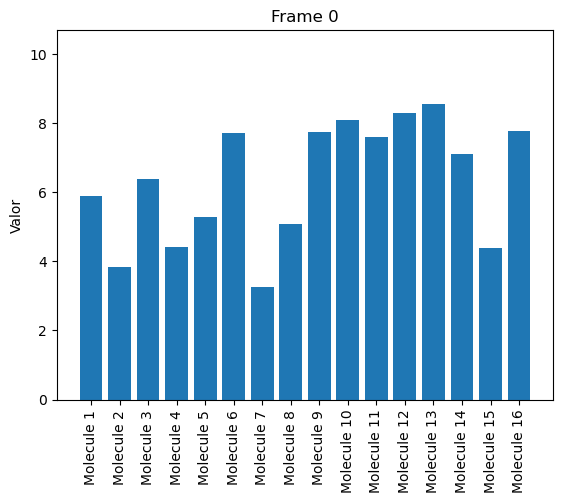

In [188]:
import matplotlib.animation as animation
from IPython.display import HTML

# Requiere esto en Jupyter Notebook/VSCode
%matplotlib inline

# Crear figura
fig, ax = plt.subplots()
labels = [f"Molecule {i+1}" for i in range(len(sol))]
x = np.arange(len(sol))
bars = ax.bar(x, frames_radius_distance[0], tick_label=labels)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, np.max(frames_radius_distance) * 1.1)
ax.set_ylabel("Valor")

# Función de actualización
def update(frame):
    for bar, y in zip(bars, frames_radius_distance[frame]):
        bar.set_height(y)
    ax.set_title(f"Frame {frame}")
    return bars

# Crear animación
anim = animation.FuncAnimation(fig, update, frames=frames_radius_distance.shape[0], interval=50, blit=False)

## Mostrar animación correctamente en Jupyter en VSCode
#HTML(anim.to_jshtml())
ani.save("animacion.mp4", writer="ffmpeg", fps=10)

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Crear figura
fig, ax = plt.subplots(figsize=(12, 8))

labels = [f"Molecule {i+1}" for i in range(len(frames_radius_distance[0]))]
x = np.arange(len(labels))
bars = ax.bar(x, frames_radius_distance[0], tick_label=labels)

plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, np.max(frames_radius_distance) * 1.1)
ax.set_ylabel("Radial Distance from the final CM of the mixture to each molecule")

# Función de actualización
def update(frame):
    y_vals = frames_radius_distance[frame]
    for bar, y in zip(bars, y_vals):
        bar.set_height(y)
    ax.set_title(f"Frame {frame}", pad =10)
    return bars

plt.tight_layout()
plt.subplots_adjust(top=0.88)
# Crear animación
ani = animation.FuncAnimation(fig, update, frames=frames_radius_distance.shape[0], interval=50, blit=False)

# Guardar el video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save("animacion.mp4", writer=writer)

plt.close(fig)  # Importante si no querés mostrar la figura estática

#HTML(anim.to_jshtml())